# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [50]:
import pandas as pd
%matplotlib inline

## imports for Python, Pandas

In [4]:
import json
from pandas.io.json import json_normalize

****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [5]:
#load the data
worldBankData = pd.read_json('data/world_bank_projects.json')


In [6]:
worldBankData.head()

,sector,supplementprojectflg,projectfinancialtype,prodline,mjtheme,idacommamt,impagency,project_name,mjthemecode,closingdate,...,majorsector_percent,board_approval_month,theme_namecode,countryname,url,source,projectstatusdisplay,ibrdcommamt,sector_namecode,_id
0,"[{'Name': 'Primary education'}, {'Name': 'Seco...",N,IDA,PE,[Human development],130000000,MINISTRY OF EDUCATION,Ethiopia General Education Quality Improvement...,"8,11",2018-07-07T00:00:00Z,...,"[{'Percent': 46, 'Name': 'Education'}, {'Perce...",November,"[{'code': '65', 'name': 'Education for all'}]",Federal Democratic Republic of Ethiopia,http://www.worldbank.org/projects/P129828/ethi...,IBRD,Active,0,"[{'code': 'EP', 'name': 'Primary education'}, ...",{'$oid': '52b213b38594d8a2be17c780'}
1,[{'Name': 'Public administration- Other social...,N,OTHER,RE,"[Economic management, Social protection and ri...",0,MINISTRY OF FINANCE,TN: DTF Social Protection Reforms Support,"1,6",NaN,...,"[{'Percent': 70, 'Name': 'Public Administratio...",November,"[{'code': '24', 'name': 'Other economic manage...",Republic of Tunisia,http://www.worldbank.org/projects/P144674?lang=en,IBRD,Active,0,"[{'code': 'BS', 'name': 'Public administration...",{'$oid': '52b213b38594d8a2be17c781'}
2,[{'Name': 'Rural and Inter-Urban Roads and Hig...,Y,IDA,PE,"[Trade and integration, Public sector governan...",6060000,MINISTRY OF TRANSPORT AND COMMUNICATIONS,Tuvalu Aviation Investment Project - Additiona...,"5,2,11,6",NaN,...,"[{'Percent': 100, 'Name': 'Transportation'}]",November,"[{'code': '47', 'name': 'Regional integration'...",Tuvalu,http://www.worldbank.org/projects/P145310?lang=en,IBRD,Active,0,"[{'code': 'TI', 'name': 'Rural and Inter-Urban...",{'$oid': '52b213b38594d8a2be17c782'}
3,[{'Name': 'Other social services'}],N,OTHER,RE,"[Social dev/gender/inclusion, Social dev/gende...",0,LABOR INTENSIVE PUBLIC WORKS PROJECT PMU,Gov't and Civil Society Organization Partnership,"7,7",NaN,...,"[{'Percent': 100, 'Name': 'Health and other so...",October,"[{'code': '57', 'name': 'Participation and civ...",Republic of Yemen,http://www.worldbank.org/projects/P144665?lang=en,IBRD,Active,0,"[{'code': 'JB', 'name': 'Other social services'}]",{'$oid': '52b213b38594d8a2be17c783'}
4,[{'Name': 'General industry and trade sector'}...,N,IDA,PE,"[Trade and integration, Financial and private ...",13100000,MINISTRY OF TRADE AND INDUSTRY,Second Private Sector Competitiveness and Econ...,"5,4",2019-04-30T00:00:00Z,...,"[{'Percent': 50, 'Name': 'Industry and trade'}...",October,"[{'code': '45', 'name': 'Export development an...",Kingdom of Lesotho,http://www.worldbank.org/projects/P144933/seco...,IBRD,Active,0,"[{'code': 'YZ', 'name': 'General industry and ...",{'$oid': '52b213b38594d8a2be17c784'}


In [7]:
#find if there are any duplicate rows
worldBankData.shape

(500, 50)

In [11]:
#get the id column of this json data and check if all ids are unique or not, this will help to find if there are any duplicate rows
worldBankData['_id'].value_counts(dropna=False, ascending=False)
#output shows that every row has unique id so data is not duplicated. 

{'$oid': '52b213b38594d8a2be17c8ee'}    1
{'$oid': '52b213b38594d8a2be17c80f'}    1
{'$oid': '52b213b38594d8a2be17c7b1'}    1
{'$oid': '52b213b38594d8a2be17c79a'}    1
{'$oid': '52b213b38594d8a2be17c813'}    1
                                       ..
{'$oid': '52b213b38594d8a2be17c8bc'}    1
{'$oid': '52b213b38594d8a2be17c8f2'}    1
{'$oid': '52b213b38594d8a2be17c801'}    1
{'$oid': '52b213b38594d8a2be17c873'}    1
{'$oid': '52b213b38594d8a2be17c937'}    1
Name: _id, Length: 500, dtype: int64

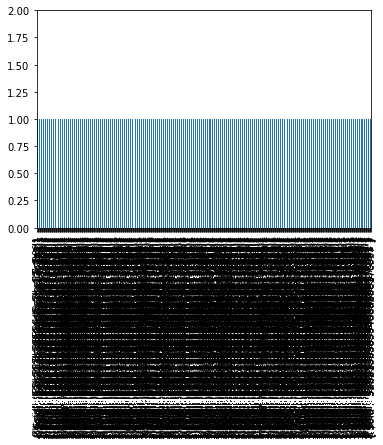

In [55]:
#check visually - no id has value > 1
worldBankData['_id'].value_counts(dropna=False, ascending=False).plot(kind='bar', xlim=(1,500), ylim=(0,2))

In [13]:
#finding the value counts for countrycode in descending order will give the top 10 countries with most projects
worldBankData['countrycode'].value_counts(dropna=False).head(10)

ID    19
CN    19
VN    17
IN    16
RY    13
NP    12
BD    12
MA    12
MZ    11
3A    11
Name: countrycode, dtype: int64

In [15]:
#Answer 1 - top tn countries with most projects
# find by country name
worldBankData['countryname'].value_counts(dropna=False).head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Nepal                              12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

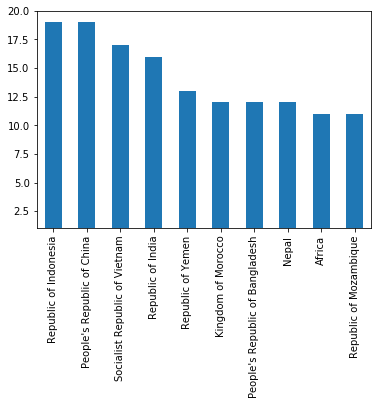

In [57]:
#plot the bar chart to show distribution of project across countries
worldBankData['countryname'].value_counts(dropna=False).head(10).plot(kind='bar', ylim=(1,20))

In [17]:
#load the json file as string
worldBankjson = json.load((open('data/world_bank_projects.json')))

In [19]:
#get normalized json data in a table for mjtheme_namecode
themeNormalized = json_normalize(worldBankjson,'mjtheme_namecode')

In [20]:
print(themeNormalized)

     code                                      name
0       8                         Human development
1      11                                          
2       1                       Economic management
3       6     Social protection and risk management
4       5                     Trade and integration
...   ...                                       ...
1494   10                         Rural development
1495    9                         Urban development
1496    8                         Human development
1497    5                     Trade and integration
1498    4  Financial and private sector development

[1499 rows x 2 columns]


In [21]:
themeNormalized['name'].value_counts(dropna=False)
#there are 122 rows with blank values

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64

In [48]:
#Answer 2 - top 10 theme code. Later we will get the theme names after doing problem 3
#find value counts of theme code since name has blank values
themeNormalized['code'].value_counts(dropna=False).head(10)
#this lists the top 10 project theme code

11    250
10    216
8     210
2     199
6     168
4     146
7     130
5      77
9      50
1      38
Name: code, dtype: int64

In [26]:
import numpy as np
themeNormalized['name'].replace('', np.nan, inplace=True)
themeNormalized
themes = themeNormalized

In [27]:
#drop nan rows
nonnull = themeNormalized.dropna(subset=['name'])
nonnull

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
...,...,...
1494,10,Rural development
1495,9,Urban development
1496,8,Human development
1497,5,Trade and integration


In [35]:
nonnull['name'].value_counts()

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Economic management                              33
Rule of law                                      12
Name: name, dtype: int64

In [36]:
uniquethemes = nonnull.drop_duplicates()
uniquethemes

,code,name
0,8,Human development
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
8,7,Social dev/gender/inclusion
11,4,Financial and private sector development
18,10,Rural development
53,9,Urban development


In [37]:
#create dictionary from themes
themesdict = dict(zip(uniquethemes['code'], uniquethemes['name']))
themesdict

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [38]:
#Answer 3
#using the map function to map the name value from the themesdict dictionary. 
#Also pringting the value counts for name column now shows the total number of each theme type has increased
themeNormalized['name'] = themeNormalized['code'].map(themesdict)
themeNormalized['name'].value_counts()

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Rule of law                                      15
Name: name, dtype: int64

In [41]:
themeNormalized.shape

(1499, 2)

In [47]:
#this assert statement returns nothing which means there are no more null values in name column
assert themeNormalized.notnull().all().all()

In [45]:
#Answer 2 - find the top ten project themes now after filling in the blank names
themeNormalized['name'].value_counts(dropna=False).head(10)

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

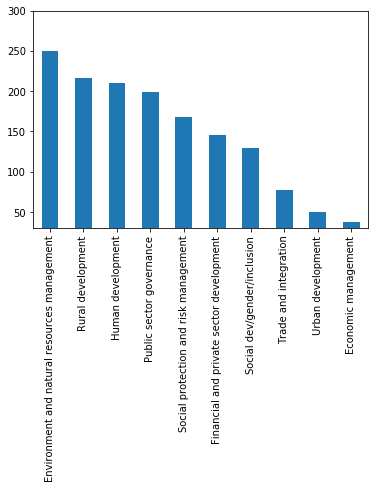

In [58]:
#Answer 2 visualization
themeNormalized['name'].value_counts(dropna=False).head(10).plot(kind='bar', ylim=(30,300))